#### colab으로 시작하기
<a href="https://colab.research.google.com/github/LDJWJ/00_TOTO_MLDL_CLASS/blob/master/DL04_01_AutoEncoder_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 04. 대표적 비지도 학습법 - Autoencoder

## 학습 내용
### 01. Autoencoder란?
### 02. 간단한 예제를 보자.
  * MNIST 데이터 셋을 활용하여 간단한 오토 인코더 신경망을 구성해 보기
  
### 03. 왜 사용되는가?

### 01. Autoencoder란?
 * **Generative model learning**, **Dimensionality reduction**, **Representation learning**, **Unsupervised learning**
 * 머신러닝 학습 방법은 크게 지도학습과 비지도 학습으로 나눌 수 있다.
 * 비지도 학습 중 가장 널리 쓰이는 신경망으로 오토인코더(Autoencoder)가 있다.
 * **입력값과 출력값을 같게** 하는 신경망이다.
 * **가운데 계층의 노드 수가 입력값보다 적은 것**이 특징이다 - 노이즈 제거에 매우 효과적
 * 오토 인코더의 개념은 **데이터 생성 모델 학습**에 넓게 사용되고 있다.

### 가. 비지도 학습 중 가장 널리 쓰이는 신경망으로 오토 인코더(AutoEncoder)가 있다.

### 나. 오토 인코더는 입력값과 출력값을 같게 하는 신경망이다.
 * 입력층으로 들어온 데이터를 인코더를 통해 은닉층으로 내보낸다. **(입력층 -> 인코더 -> 은닉층)**
 * 은닉층의 데이터를 디코더를 통해 출력층으로 내보낸다.  **(은닉층 -> 디코더 -> 출력층)**
 * 만들어진 출력값을 입력값과 비슷해지도록 만드는 가중치를 찾아내는 것이다.

### 다. 가운데 계층의 노드 수가 입력값보다 적은 것이 특징이다.
 * 결과적으로 **입력 데이터를 압축하는 효과**를 얻는다. 이 과정이 **노이즈 제거**에 많이 효과적이다.

### 라. Autoencoder의 종류
* 변이형 오토 인코더(Variational Autoencoder) - Variational AE(VAE), Conditional VAE(CVAE), Adversarial AE(AAE)
* 그외, 잡음제거 오토 인코더(Denoising Autoencoder) Contracitve AE(CAE) 등의 다양한 방식의 오토 인코더가 있다.

### 마. 학습된 인코더에서의 각 역할
* 인코더는 차원 축소의 역할을 수행 --> **Manifold learning**
* 디코더는 생성 모델의 역할을 수행 --> **Generative model learning**

### 메모 :
 *  (01) 입력층으로 들어온 데이터를 인코더를 통해 은닉층으로 내보낸다.
 *  (02) 은닉층의 데이터를 디코더를 통해 출력층으로 내보낸다.
 *  (03) 만들어진 출력값과 입력값이 같아지도록 만드는 가중치를 찾아낸다.

### 02. 간단한 예제를 통한 확인

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib as ml
import matplotlib.pyplot as plt

In [2]:
print("tf 버전 :" , tf.__version__)
print("numpy 버전 :" ,np.__version__)
print("matplotlib 버전 :" , ml.__version__)

tf 버전 : 1.15.0
numpy 버전 : 1.18.2
matplotlib 버전 : 3.2.0


### 데이터 불러오기

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

print(mnist.train.images.shape)
print(mnist.train.labels.shape)

print(mnist.test.images.shape)
print(mnist.test.labels.shape)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
(55000, 784)
(55000, 10)
(10000, 784)
(10000, 10)


### 신경망 기본 설정

In [0]:
learning_rate = 0.01    # 학습율 0.01
training_epoch = 20     # 전체 데이터 훈련 횟수 20회 
batch_size = 100        # 배치 사이즈 100
n_hidden = 256          # 은닉층의 개수 256
n_input = 28 * 28       # 784개 (입력층) 

### 인코더 만들기 
 * (1) 맨처음은 n_hidden개의 뉴런을 만든다. 
    * 가중치와 편향 변수를 원하는 뉴런의 개수만큼 설정한다.
 * (2) 변수들을 입력값과 곱하고 더한 후, 활성화 함수 sigmoid 함수를 적용한다.
    * n_input 값보다 n_hidden 값이 더 작다.

In [0]:
X = tf.placeholder(tf.float32, [None, n_input]) # X 플레이스 홀더, 비지도학습 Y가 없음.

### 인코더와 디코더를 만들기(은닉층)
* n_hidden개의 뉴런을 가진 은닉층 만들기
* 가중치(W_encode), 편향변수(b_encode)를 뉴런 개수 만큼 설정
* 활성화 함수 적용(sigmoid)

In [12]:
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))
encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))
encoder

<tf.Tensor 'Sigmoid_4:0' shape=(?, 256) dtype=float32>

### 디코더 만들기
 * 은닉층의 크기(입력)로 출력값을 입력층과 동일하게 만듬.

In [11]:
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode))  # 활성화 함수 적용
decoder

<tf.Tensor 'Sigmoid_3:0' shape=(?, 784) dtype=float32>

### 손실함수, 최적화 알고리즘 적용시키기
* 입력값을 X를 평가하기 위한 실측값으로 사용한다.
* 디코더가 내보낸 결과값의 차이를 손실값으로 설정한다.
* 손실함수(MSE-Mean Squared Error 적용)
* RMSPropOptimizer 함수를 이용하여 최적화 알고리즘 적용

In [14]:
cost = tf.reduce_mean(tf.pow(X- decoder, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)
optimizer

<tf.Operation 'RMSProp_1' type=NoOp>

### 그래프 실행 - 학습을 진행

In [15]:
%%time

init = tf.global_variables_initializer()  # 그래프 초기화 
sess = tf.Session()                       # 세션 연결
sess.run(init)                            # 세션 초기화

total_batch = int(mnist.train.num_examples/batch_size) # 전체 배치에 따른 수행횟수

for epoch in range(training_epoch):  # 전체 데이터 학습 수행횟수
    total_cost = 0
    
    for i in range(total_batch):     # 배치 사이즈에 따른 학습 수행.(W값 업데이트)
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], 
                              feed_dict={X:batch_xs})
        total_cost += cost_val
        
    print('Epoch:', '%04d' % (epoch + 1), 
         'Avg. cost=', '{:.4f}'.format(total_cost / total_batch))
    
print('최적화 완료!')

Epoch: 0001 Avg. cost= 0.2029
Epoch: 0002 Avg. cost= 0.0592
Epoch: 0003 Avg. cost= 0.0479
Epoch: 0004 Avg. cost= 0.0432
Epoch: 0005 Avg. cost= 0.0391
Epoch: 0006 Avg. cost= 0.0373
Epoch: 0007 Avg. cost= 0.0363
Epoch: 0008 Avg. cost= 0.0356
Epoch: 0009 Avg. cost= 0.0350
Epoch: 0010 Avg. cost= 0.0345
Epoch: 0011 Avg. cost= 0.0338
Epoch: 0012 Avg. cost= 0.0331
Epoch: 0013 Avg. cost= 0.0314
Epoch: 0014 Avg. cost= 0.0309
Epoch: 0015 Avg. cost= 0.0307
Epoch: 0016 Avg. cost= 0.0306
Epoch: 0017 Avg. cost= 0.0304
Epoch: 0018 Avg. cost= 0.0303
Epoch: 0019 Avg. cost= 0.0302
Epoch: 0020 Avg. cost= 0.0299
최적화 완료!
CPU times: user 2min 18s, sys: 8.79 s, total: 2min 26s
Wall time: 1min 21s


### 학습된 모델을 이용. 테스트 데이터 셋을 활용하여 출력 이미지 생성
* 10개의 테스트 데이터를 가지고 학습한 신경망을 이용하여 출력값 생성해 보기

In [16]:
mnist.test.images[0].shape

(784,)

In [0]:
sample_size = 10
samples = sess.run(decoder, 
                  feed_dict = {X:mnist.test.images[:sample_size]})

## 입력데이터와 생성한 데이터 확인
 * 위쪽이 원본 데이터, 아래쪽이 신경망이 생성한 이미지

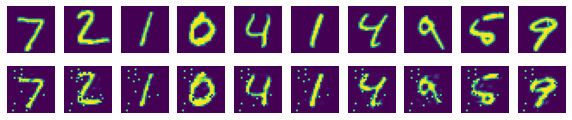

In [18]:
fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
    ax[1][i].imshow(np.reshape(samples[i], (28,28)))
    
plt.show()

### 실습해 보기
* 01 자신이 원하는 것을 하나 또는 두개를 변경한 이후에 오토인코더 신경망을 학습시켜보고, 이에 대한 결과를 확인해 보자.
  * (사전 조건) epoch의 수는 20으로 동일하게 한다.
  * cost를 확인 후, 전과 비교하여 이를 토대로 이야기를 해 보자.